In [120]:
import pandas as pd


In [121]:
import plotly.express as px
import seaborn as sns

# Normal Distribution

In [122]:
df = pd.read_csv("train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
f(Pclass, Fare, Age) -> Survived

<Axes: ylabel='Frequency'>

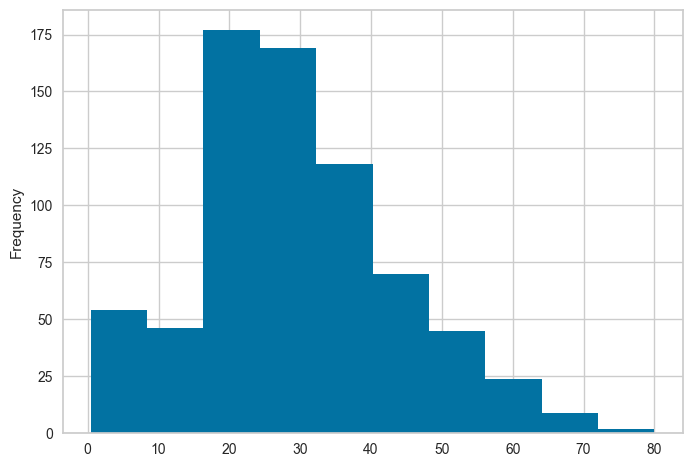

In [123]:
df["Age"].plot(kind="hist")

## Binning/Histogram

In [124]:
print(df["Age"].shape)
age = df["Age"].dropna()
print(age.shape)

(891,)
(714,)


In [125]:
age.dtype

dtype('float64')

In [126]:
age.min(),age.max()

(0.42, 80.0)

In [127]:
age_bins = pd.DataFrame()

In [128]:
age_bins = pd.qcut(age,5)
age_bins

0       (19.0, 25.0]
1       (31.8, 41.0]
2       (25.0, 31.8]
3       (31.8, 41.0]
4       (31.8, 41.0]
           ...      
885     (31.8, 41.0]
886     (25.0, 31.8]
887    (0.419, 19.0]
889     (25.0, 31.8]
890     (31.8, 41.0]
Name: Age, Length: 714, dtype: category
Categories (5, interval[float64, right]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

<Axes: xlabel='Age'>

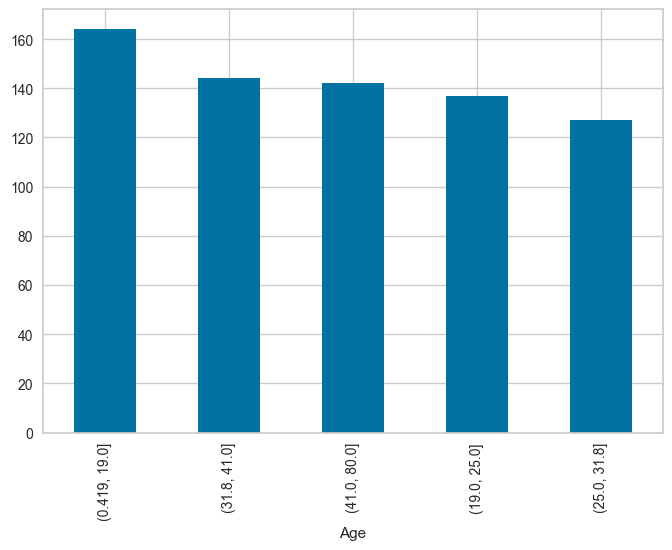

In [129]:
age_bins.value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

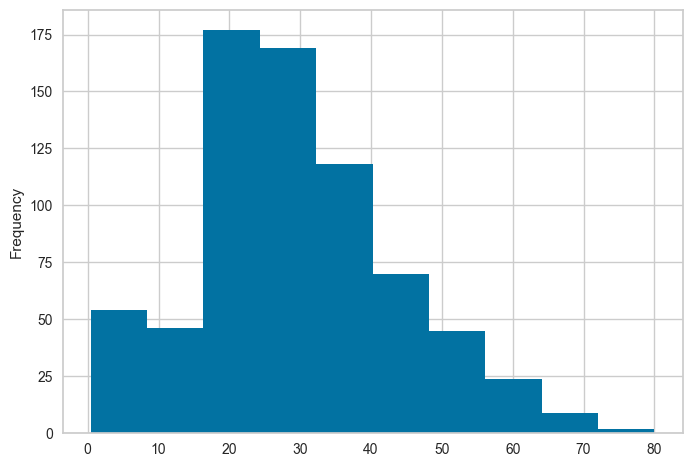

In [130]:
df["Age"].plot(kind="hist")

In [131]:
age["age_bins"] = pd.qcut(age,10)
age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: object

<Axes: ylabel='Frequency'>

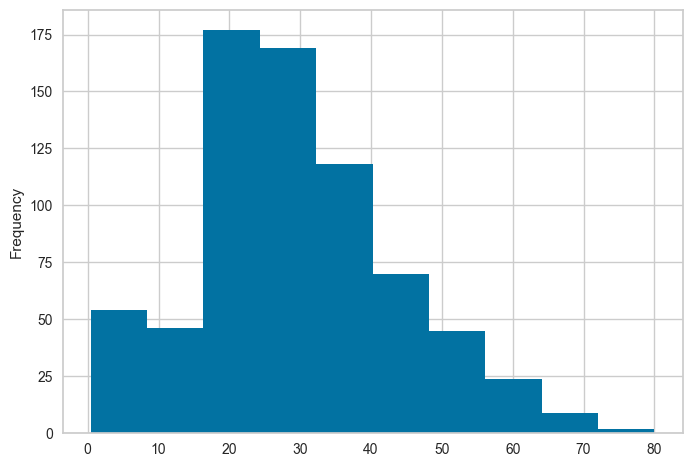

In [132]:
df["Age"].plot(kind="hist")

In [133]:
30-14

16

## Mean-Median-Mode

In [134]:
import numpy as np

In [135]:
age = df["Age"].dropna().tolist()
np.mean(age)

29.69911764705882

In [136]:
#[1,2,3,4,2,1]
(1+2+3+4+2+1)/6

2.1666666666666665

In [137]:
[1,1,2,2,3,4]

[1, 1, 2, 2, 3, 4]

In [138]:
np.median(age)

28.0

In [139]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [140]:
28-14

14

In [141]:
14-14

0

In [142]:
28+14

42

In [143]:
42+14

56

In [144]:
56+14

70

In [145]:
import numpy as np

## Standard Deviation

In [146]:
np.std(df["Age"])

14.516321150817316

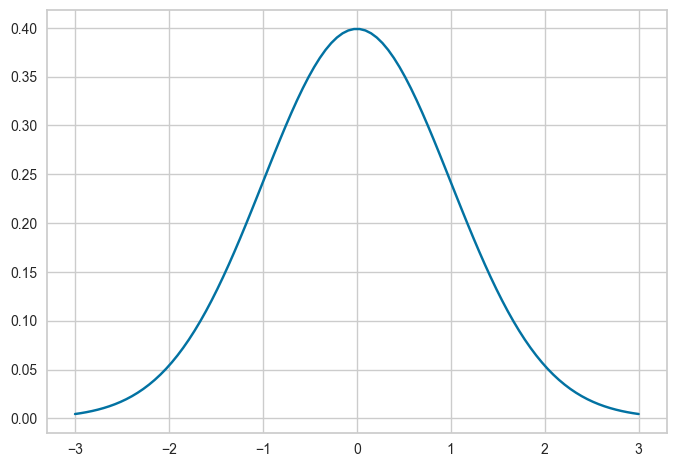

In [147]:
import math
import matplotlib.pyplot as plt
import scipy.stats as st
mean = 0
variance = 1
std = math.sqrt(variance)
normal = np.linspace(mean-3*std, mean+3*std,100)
plt.plot(normal,st.norm.pdf(normal,mean,std))
plt.show()

In [148]:
0 +1, 0+1+1,0+1+1+1

(1, 2, 3)

## Variance and Covariance

# Feature Scaling

|House|Dimensions|Bedrooms|
|---|---|---|
|A|15000 sqft|4|
|B|2000 sqft|3|
|C|3000 sqft|4|

price = w1 * Dimensions + w2 * Bedrooms

price = 3 * Dimensions 

- Min-Max Scaling
- Standardization
- Log Scaling
- Absolute Max Scaling

### Mix - Max Scaling
It transforms a feature int a range from 0 to 1.

(actual_data point - minimum(entire_data_set))/(maximum(entire_data_set)-minimum(entire_data_set))

In [149]:
data_point1 = df["Age"][0]
data_point1

22.0

In [150]:
min_age, max_age = np.min(df["Age"]),np.max(df["Age"])

In [151]:
(data_point1 - min_age)/(max_age-min_age)

0.2711736617240513

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
min_max_scaler = MinMaxScaler()

<Axes: ylabel='Frequency'>

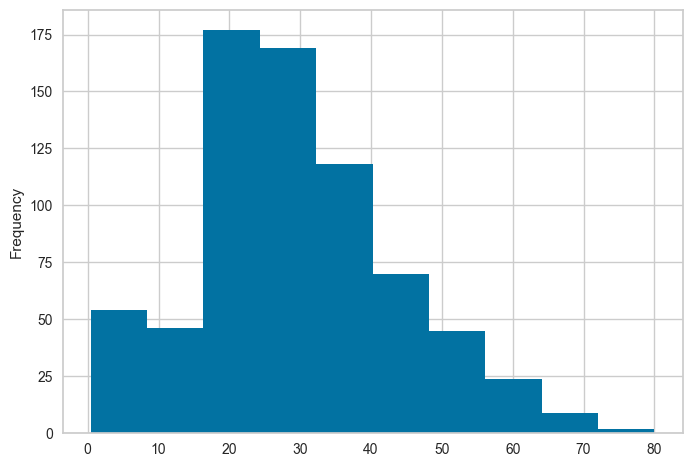

In [154]:
df["Age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

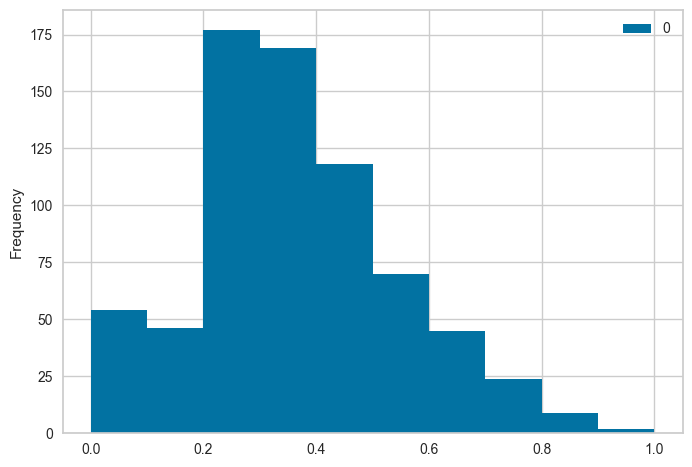

In [155]:
scaled_age = min_max_scaler.fit_transform(df[["Age"]].dropna())
pd.DataFrame(scaled_age).plot(kind="hist")

In [156]:
df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [157]:
#Height + weight -> BP

In [158]:
house_dims = np.array([15000,2000,3000,10000])
min_max_scaler = MinMaxScaler()
house_dims_scaled = min_max_scaler.fit_transform(house_dims.reshape(-1,1))
house_dims_scaled

array([[1.        ],
       [0.        ],
       [0.07692308],
       [0.61538462]])

In [159]:
house_rooms = np.array([4,2,3,4])
min_max_scaler = MinMaxScaler()
house_rooms_scaled = min_max_scaler.fit_transform(house_rooms.reshape(-1,1))
house_rooms_scaled

array([[1. ],
       [0. ],
       [0.5],
       [1. ]])

## Standardization - Z score scaling

mean_data
std_data
data_point

(data_point - mean_data)/std_data

In [160]:
data_point = df["Age"][0]
data_point

22.0

In [161]:
mean_data = np.mean(df["Age"])
std_data = np.std(df["Age"])

In [162]:
mean_data,std_data

(29.69911764705882, 14.516321150817316)

In [163]:
scaled_data_point = (data_point - mean_data)/std_data
scaled_data_point

-0.5303766406838785

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
standard_scaler = StandardScaler()

In [166]:
#fit
#transform/predict

In [167]:
standard_scaler.fit(df[["Age"]].dropna())

StandardScaler()

In [168]:
standard_scaled_age = standard_scaler.transform(df[["Age"]].dropna())

<Axes: ylabel='Frequency'>

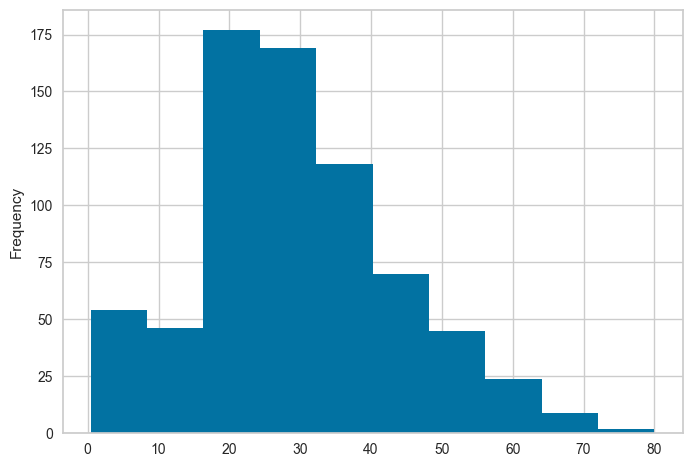

In [169]:
df["Age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

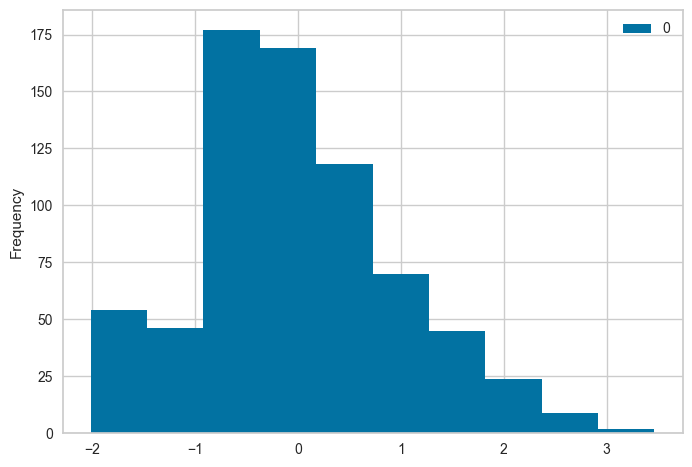

In [170]:
pd.DataFrame(standard_scaled_age).plot(kind="hist")

Z Score Scaling

It scales the data so that the data has two properties
- 0 mean
- 1 standard deviation

In [171]:
house_dims = np.array([15000,2000,3000,10000])

house_dims_scaled = standard_scaler.fit_transform(house_dims.reshape(-1,1))
house_dims_scaled

array([[ 1.4110813 ],
       [-1.03479296],
       [-0.84664878],
       [ 0.47036043]])

<Axes: ylabel='Frequency'>

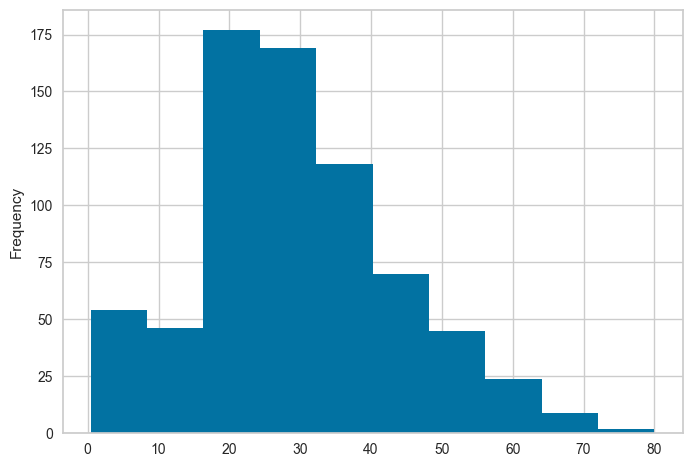

In [172]:
df["Age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

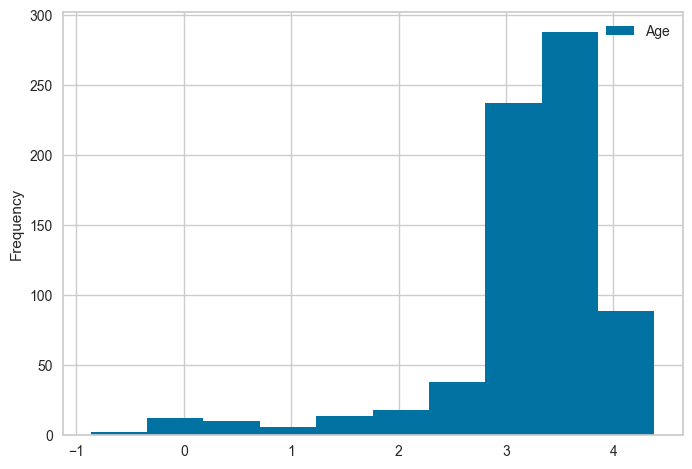

In [173]:
log_age = np.log(df["Age"].dropna())
pd.DataFrame(log_age).plot(kind="hist")

# EDA Basics

Exploratory Data Analysis (EDA) is a way to investigate datasets and find preliminary information, insights, or uncover underlying patterns in the data. Instead of making assumptions, data can be processed in a systematic method to gain insights and make informed decisions.

- Descriptive
- Visuals

In [174]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
#AC Tier 1, AC Tier 2, AC Tier 3 (Ordinal Categorical Variable)
#Male, Female(Gender) (Nominal Categrocial Variable)

### Two kind of Data Types
- Continious/Numerical
- Categorical:
    - Ordinal(Pclass)
    - Nominal(Sex)


- Unary and Continious Data Analysis
- Unary and Categorical Data Analysis
- Binary: Continious->Continious
- Binary: Continious->Catgorical
- Binary: Categorical->Categorical
- Binary: Categorical->Continious

In [176]:
9:05

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (32002400.py, line 1)

In [ ]:
!pip install yellowbrick

## Anscombe’s Quartet

/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/yellowbrick/anscombe.py:75: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, c=color)
/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/yellowbrick/anscombe.py:75: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, c=color)
/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/yel

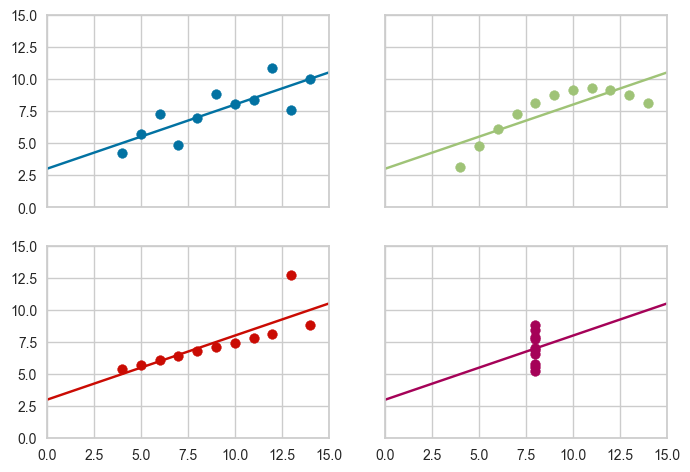

In [ ]:
import yellowbrick as yb
import matplotlib.pyplot as plt

g = yb.anscombe()
plt.show()

## RadViz

## Box Plot - Continious Variables

https://en.wikipedia.org/wiki/Box_plot

### Unary Continious Analysis

In [ ]:
fig = px.box(df, y="Age")
fig.show()

## Categorical -> Continious Plot

In [ ]:
fig = px.box(df,x="Sex", y="Age")
fig.show()

# Categorical - Categorical -> Continious Analysis

In [ ]:
fig = px.box(df,x="Sex", y="Age",color="Survived")
fig.show()

In [ ]:
fig = px.box(df,x="Pclass", y="Age",)
fig.show()

In [ ]:
fig = px.box(df,x="Pclass", y="Age",color="Survived")
fig.show()

In [ ]:
fig = px.box(df,x="Survived", y="Fare")
fig.show()

In [ ]:
fig = px.box(df,x="Survived", y="Age")
fig.show()

<Axes: xlabel='Sex', ylabel='Age'>

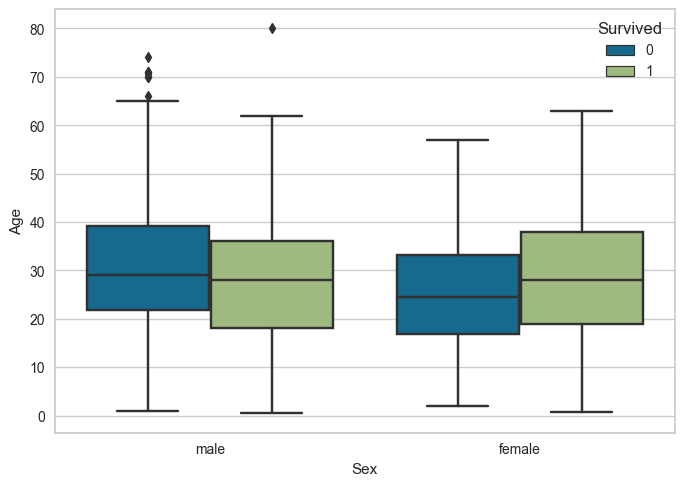

In [ ]:
sns.boxplot(x="Sex",y="Age",hue="Survived",data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

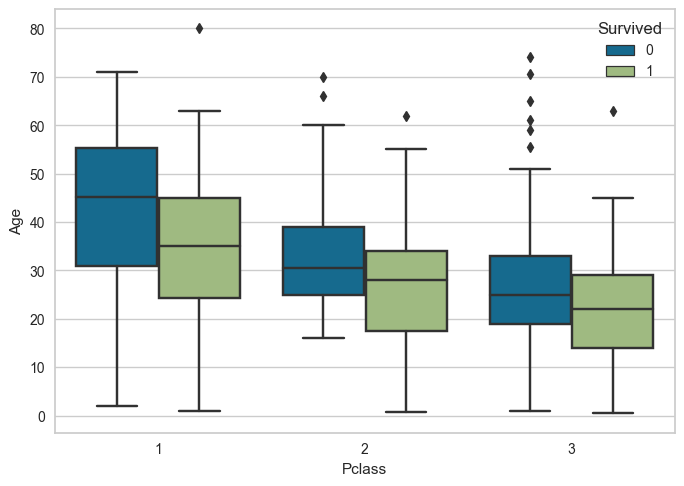

In [ ]:
sns.boxplot(x="Pclass",y="Age",hue="Survived",data=df)

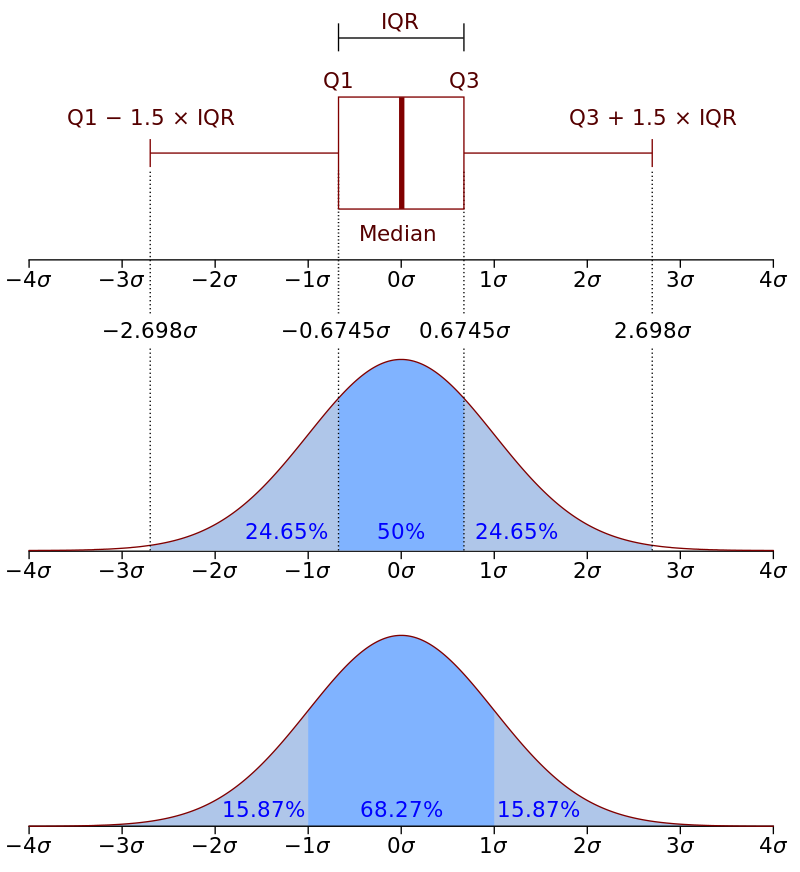

## Categorical Plot

In [ ]:
px.histogram(df,x="Survived",color="Sex")

<Axes: xlabel='Sex', ylabel='count'>

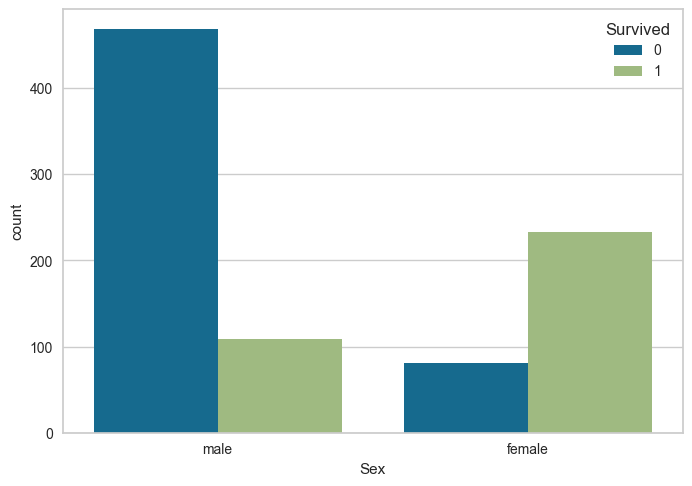

In [ ]:
sns.countplot(x="Sex",hue="Survived",data=df)

<Axes: xlabel='Pclass', ylabel='count'>

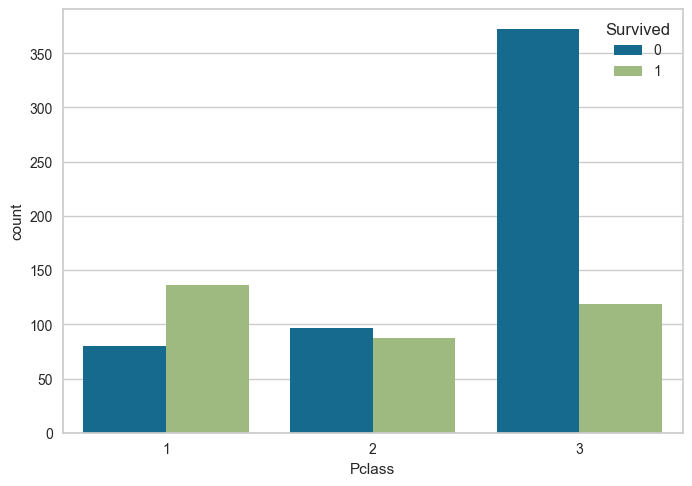

In [ ]:
sns.countplot(x="Pclass",hue="Survived",data=df)

In [ ]:
pd.crosstab(df["Pclass"],df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
pd.crosstab(df["Pclass"],df["Survived"]).apply(lambda r: r/r.sum(), axis=1)*100

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


<Axes: xlabel='Age', ylabel='Count'>

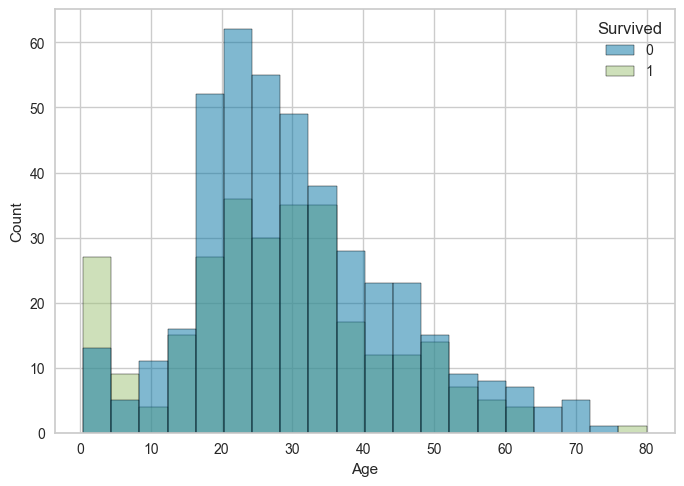

In [ ]:
sns.histplot(data=df, x="Age", hue="Survived")

<Axes: ylabel='count'>

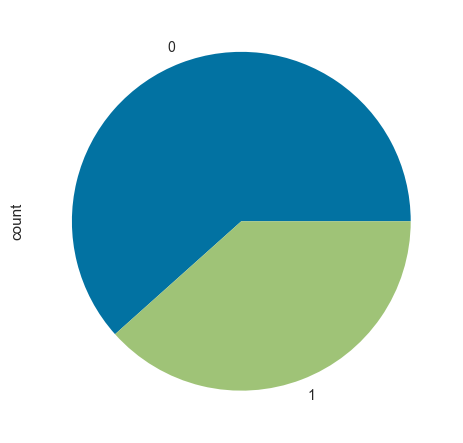

In [179]:
df["Survived"].value_counts().plot(kind="pie")

## Mutual Information